# Task

In the file 'auto.csv', the following data can be found pertaining to different cars:

* Cylinders
* Cylinder capacity
* Horsepower
* Weight
* Acceleration
* Year of make
* Origen
* Consumption (mpg)

The units of the characteristics are not in SI units. The variable "origin" is a numer that identifies the country of origin.

Create a model with the data that can estimate fuel consumption from the rest of the data.

### Import libraries to be used

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Load dataset
df = pd.read_csv('auto.csv')

df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


In [3]:
# Check dataset for missing values and column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


In [4]:
# Look at origin column as we may have to stratify train- test split to represent each value according to its proportion
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [5]:
# Create X and y variables for splitting the data
X = df.drop('mpg', axis=1)
y = df['mpg']

In [6]:
# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=X['origin'], random_state=123)

We shuffle the data in case there is some oredering to the data based on the *origin* column. We also stratify on the origin column so that both X_train and X_test have the same proportions of the cars' origins. Stratifying on origin produces better results when it comes to predicting on the test set as opposed to not stratifying.

### Create regression models

This model has an RMSE of 3.056
This model has an R-squared value of 0.837


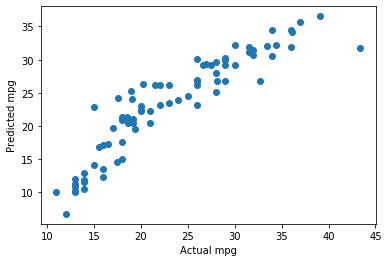

In [7]:
lr = LinearRegression() # Initiate LinearRegression model

lr.fit(X_train, y_train) # Fit on X_train and y_train created previously

lr_preds = lr.predict(X_test) # Predict mpg from X_test and save as lr_preds

print('This model has an RMSE of', round(mean_squared_error(y_test, lr_preds, squared=False), 3)) # Print RMSE
print('This model has an R-squared value of', round(r2_score(y_test, lr_preds), 3)) # Print R-squared 

# Plot Actual vs Predicted mpg values
plt.scatter(y_test, lr_preds)
plt.xlabel('Actual mpg')
plt.ylabel('Predicted mpg')
plt.show()

This model has an RMSE of 2.844
This model has an R-squared value of 0.859


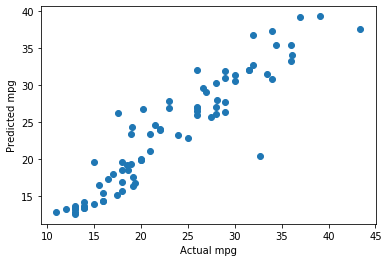

In [8]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False) # Initiate PolynomialFeatures to a degree of 2
X_2_train = poly_2.fit_transform(X_train) # Fit and transform X_train
X_2_test = poly_2.transform(X_test) # Transform X_test

lr_poly = LinearRegression() # Initiate model
lr_poly.fit(X_2_train, y_train) # Fit model to data

poly_preds = lr_poly.predict(X_2_test) # Predict and save as poly_preds

print('This model has an RMSE of', round(mean_squared_error(y_test, poly_preds, squared=False), 3)) # Print RMSE
print('This model has an R-squared value of', round(r2_score(y_test, poly_preds), 3)) # Print R-squared


# Plot Actual vs Predicted mpg values
plt.scatter(y_test, poly_preds)
plt.xlabel('Actual mpg')
plt.ylabel('Predicted mpg')
plt.show()

If we do not create dummies from the categorical variabes (origin) then the best model between the previous two is the linear regression model using the `PolynomialFeatures` function to the second degree. However, as origin is a categorical variable, we should try to see how one-hot encoding this feature affects our models

### One-hot encoding the dataset

In [9]:
# We can simply use the pandas function get_dummies 
X_dummies = pd.get_dummies(X, prefix='origin', columns=['origin']) # Pass prefix and desired column on which to one-hot encode
X_dummies

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [10]:
# Split dummified dataset into train and test datasets
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_dummies, y, test_size=0.2, shuffle=True,
                                                        stratify=X_dummies[['origin_1', 'origin_2', 'origin_3']],
                                                        random_state=123)

This model has an RMSE of 3.531
This model has an R-squared value of 0.805


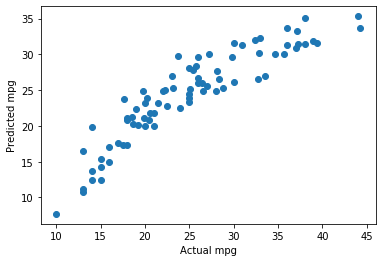

In [11]:
lr_dum = LinearRegression() # Initiate model

lr_dum.fit(Xd_train, yd_train) # Fit model to train data

lr_dum_preds = lr_dum.predict(Xd_test) # Predict on test data

print('This model has an RMSE of', round(mean_squared_error(yd_test, lr_dum_preds, squared=False), 3)) # Print RMSE
print('This model has an R-squared value of', round(r2_score(yd_test, lr_dum_preds), 3)) # Print R-squared

# Plot Actual vs Predicted mpg values
plt.scatter(yd_test, lr_dum_preds)
plt.xlabel('Actual mpg')
plt.ylabel('Predicted mpg')
plt.show()

This model has an RMSE of 3.169
This model has an R-squared value of 0.843


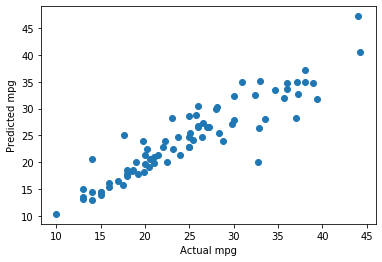

In [12]:
poly_2_dum = PolynomialFeatures(degree=2, include_bias=False) # Initiate PolynomialFeatures to a degree of 2
X_2_dum_train = poly_2_dum.fit_transform(Xd_train) # Fit and transform X_train
X_2_dum_test = poly_2_dum.transform(Xd_test) # Transform X_test

lr_poly_dum = LinearRegression() # Initiate model
lr_poly_dum.fit(X_2_dum_train, yd_train) # Fit model to train data

poly_preds_dum = lr_poly_dum.predict(X_2_dum_test) # Predict on test data

print('This model has an RMSE of', round(mean_squared_error(yd_test, poly_preds_dum, squared=False), 3)) # Print RMSE
print('This model has an R-squared value of', round(r2_score(yd_test, poly_preds_dum), 3)) # Print R-squared

# Plot Actual vs Predicted mpg values
plt.scatter(yd_test, poly_preds_dum)
plt.xlabel('Actual mpg')
plt.ylabel('Predicted mpg')
plt.show()

Of the 4 models created here, the final model utilising `PolynomialFeatures` to the sencond degree in conjuction with `LinearRegression` on data that has been one-hot encoded on the categorical feature origin, produces the best results base on boht the RMSE and R<sup>2</sup>. The samller RMSE suggests that the predicted values are closer to the actual values in this final model that the other. The R<sup>2</sup> value indicates that 84.3% of the variance of mileage is explained in this model.